# D212 Data Mining II Performance Assessment, Task \# 3

Submitted by Ubaldo Martinez III, Association Rules & Lift Analysis, Master of Science, Data Analytics, WGU

## Table of Contents
<ul>
<li><a href="#PartA1">A1: Research Question</a></li>
<li><a href="#PartA2">A2: Objectives & Goals</a></li>
<li><a href="#PartB1">B1: Technique of Market Basket Analysis</a></li>
<li><a href="#PartB2">B2: Example of Transaction</a></li>
<li><a href="#PartB3">B3: Assumptions of Market Basket Analysis</a></li>
<li><a href="#PartC1">C1: Data Preparation</a></li>
<li><a href="#PartC2">C2: Generation of Association Rules</a></li>
<li><a href="#PartC3">C3: Association Rules Table</a></li>
<li><a href="#PartC4">C4: Top Rules</a></li>
<li><a href="#PartD1">D1: Summary of Analysis</a></li>
<li><a href="#PartD2">D2: Practical Significance</a></li>
<li><a href="#PartD3">D3: Recommendations</a></li>
<li><a href="#PartE">E: Panopto Recording</a></li> 
<li><a href="#PartF">F: Third-Party Code</a></li>  
<li><a href="#PartG">G: Sources</a></li> 
</ul>

# Part I: Research Question

<a id='PartA1'></a>
## <span style="color:green">A1: Research Question</span>

Which medications exhibit a positive association and are frequently purchased together with 'amphetamine salt combo xr'?

<a id="#PartA2"></a>
## <span style="color:green">A2: Objectives & Goals</span>

Presently, patients are confronted with a predicament of nationwide pharmacy shortages, which necessitates either an abrupt switch of medications or waiting for weeks (unless one is willing to pay exorbitant prices for brand-name medication) to procure the necessary medication. By scrutinizing the purchasing patterns and co-prescriptions of 'amphetamine salt combo xr' with other medications, the analysis can unveil medications that are frequently bought in conjunction with 'amphetamine salt combo xr'. These commonly purchased alternative medications can then be recommended to patients or physicians as substitutes, thereby guaranteeing that patients receive requisite treatment even in times of medication scarcity.

# Part II: Market Basket Justification

<a id="#PartB1"></a>
## <span style="color:green">B1: Technique of Market Basket Analysis</span>

Market basket analysis is a data mining method that identifies correlations between items purchased together in a transaction. By analyzing purchasing patterns, organizations can predict future sales and gain insights into their customer base. In healthcare, market basket analysis can reveal patient characteristics, such as demographics, medical conditions, and treatment preferences.

Market basket analysis commonly employs the Apriori algorithm, which aims to discover frequent itemsets in a dataset through the iterative combination of smaller ones. By setting a minimum support threshold, the algorithm eliminates infrequent itemsets that fail to meet the threshold, effectively reducing the search space and improving efficiency compared to brute-force methods.

Apriori algorithm can be evaluated by the following metrics:

- Support: The fraction of transactions containing the itemset divided by the total number of transactions in the dataset.
- Confidence: The likelihood that other items in an itemset will appear in a transaction containing one item in that itemset.
- Lift: The proportion of the observed support of an itemset to the expected support if the items were not interdependent.

For the purpose of this analysis, my aim is to formulate rules that incorporate 'amphetamine salt combo xr' either as an antecedent or a consequent. The intended outcome of these rules would manifest in the form of "If amphetamine..., then X" or "If X, then amphetamine...".

<a id="#PartB2"></a>
## <span style="color:green">B2: Example of Transaction</span>

Figure B2 displays the first transaction of the dataset and below the image is the actual code to produce the results.

<br>
<b>Figure B2</b>
<br>
<i>Display One Example Transaction</i>

![FigureB2.1](./Data/FigureB2.1.png)
![FigureB2.2](./Data/FigureB2.2.png)

<span style="color:red"><b>Note: </b></span>Code To Generate Figure B2

```
# Divide Columns Into Two Groups To Display The Full Transaction

pd.set_option("display.max_columns", None)

col1 = ['Presc01','Presc02','Presc03','Presc04','Presc05','Presc06','Presc07','Presc08','Presc09','Presc10']
col2 = ['Presc11','Presc12','Presc13','Presc14','Presc15','Presc16','Presc17','Presc18','Presc19','Presc20']

# Display Transaction w/ Columns 1 - 10
df[col1].head(1)

# Display Transaction w/ Columns 11 - 20
df[col2].head(1)

```

Displaying one example transaction from the dataset, we can see it consist of 20 possible prescriptions, this particular transaction, the patient bought 20 prescriptions (amlodipine, albuterol aerosol, pantoprazole, lorazepam, omeprazole, mometasone, fluconozole, gabapentin, pravastatin, cialis, losartan, metoprolol, succinate XL, sulfamethoxazole, abilify, spironolactone, albuterol HFA, levofloxacin, promethazine, glipizide).

<a id="#PartB3"></a>
## <span style="color:green">B3: Assumptions of Market Basket Analysis</span>

The underlying principle of market basket analysis postulates that items bought in a solitary transaction, colloquially referred to as a 'basket', bear significance, as the purchase of one item is generally linked to the acquisition of another. No other enterprise in the world has harnessed this principle as adroitly as Amazon. Armed with millions of previous customer purchases, Amazon utilizes this knowledge to unearth enduring associations among items purchased together, suggest to customers items that they may 'require' prior to checkout, and optimize profitability.

Although some relationships between items can be identified through exploratory analysis or visualizations, certain connections may not be immediately apparent (for example, when purchasing a computer, a keyboard is often also required). To uncover these hidden and intricate associations within extensive datasets, the Apriori algorithm is employed. This algorithm enables frequent item set mining and association rule learning, which can help companies leverage their data resources and optimize their revenue.

# Part III: Data Preparation & Analysis

<a id="#PartC1"></a>
## <span style="color:green">C1: Data Preparation</span>

After importing the data into a dataframe and inspecting its structure, it is evident cleaning and formatting are necessary for conducting market basket analysis accurately.

- S1: Remove empty rows between transactions & verify the number of unique rows are 7,501.
- S2: Remove empty columns displayed with 'NaN' by moving them into a temporary list (array) labeled as rowList.
- S3: Iterate and transfer values from rowList into mainList.
- S4: Fit & Transform values within mainList into boolean datatype (True or False).
- S5: Generate a new dataframe labeled 'df_c' for cleaned & transformed dataset and verify everything is correct by displaying a portion of the dataframe.
- S6: Export final dataframe to a CSV file to proceed with MBA.

### Import Packages

In [223]:
# Pandas
import logging
import pandas as pd

# Scientific Computing
import numpy as np

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['font.family'] = 'Arial, sans-serif'
plt.rcParams['figure.figsize'] = (12,8)
plt.style.use("dark_background")

# Mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
# %pip install mlxtend

# Warnings
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )
logging.getLogger('matplotlib.font_manager').disabled = True
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

### Import Dataset

In [224]:
# 'index_col=0' Left Out On Purpose To Display The First Item Properly
df = pd.read_csv('Data/medical_market_basket.csv')

In [225]:
pd.set_option("display.max_columns", None)
df.head(3)

,Presc01,Presc02,Presc03,Presc04,Presc05,Presc06,Presc07,Presc08,Presc09,Presc10,Presc11,Presc12,Presc13,Presc14,Presc15,Presc16,Presc17,Presc18,Presc19,Presc20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,amlodipine,albuterol aerosol,allopurinol,pantoprazole,lorazepam,omeprazole,mometasone,fluconozole,gabapentin,pravastatin,cialis,losartan,metoprolol succinate XL,sulfamethoxazole,abilify,spironolactone,albuterol HFA,levofloxacin,promethazine,glipizide
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### S1: Remove Empty Rows

In [226]:
df = df[df['Presc01'].notna()]

# Reset Index
df.reset_index(drop=True, inplace=True)

In [227]:
# Verify Empty Rows No Longer Appear
df.head(5)

,Presc01,Presc02,Presc03,Presc04,Presc05,Presc06,Presc07,Presc08,Presc09,Presc10,Presc11,Presc12,Presc13,Presc14,Presc15,Presc16,Presc17,Presc18,Presc19,Presc20
0,amlodipine,albuterol aerosol,allopurinol,pantoprazole,lorazepam,omeprazole,mometasone,fluconozole,gabapentin,pravastatin,cialis,losartan,metoprolol succinate XL,sulfamethoxazole,abilify,spironolactone,albuterol HFA,levofloxacin,promethazine,glipizide
1,citalopram,benicar,amphetamine salt combo xr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,enalapril,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,paroxetine,allopurinol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,abilify,atorvastatin,folic acid,naproxen,losartan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Below Is The Code Used For Part B2

In [228]:
# Divide Columns Into Two Groups To Display The Full Transaction

pd.set_option("display.max_columns", None)

col1 = ['Presc01','Presc02','Presc03','Presc04','Presc05','Presc06','Presc07','Presc08','Presc09','Presc10']
col2 = ['Presc11','Presc12','Presc13','Presc14','Presc15','Presc16','Presc17','Presc18','Presc19','Presc20']

In [229]:
# Display Transaction w/ Columns 1 - 10
df[col1].head(1)

,Presc01,Presc02,Presc03,Presc04,Presc05,Presc06,Presc07,Presc08,Presc09,Presc10
0,amlodipine,albuterol aerosol,allopurinol,pantoprazole,lorazepam,omeprazole,mometasone,fluconozole,gabapentin,pravastatin


In [230]:
# Display Transaction w/ Columns 11 - 20
df[col2].head(1)

,Presc11,Presc12,Presc13,Presc14,Presc15,Presc16,Presc17,Presc18,Presc19,Presc20
0,cialis,losartan,metoprolol succinate XL,sulfamethoxazole,abilify,spironolactone,albuterol HFA,levofloxacin,promethazine,glipizide


### S2-S3: Move Row & Column Values Into A List of Arrays

In [231]:
# Store Final Values In Main List
mainList = []

# Iterate Through Each Row, Within Row Iterate Through Each Column
for row in range(len(df)):
    
    # Store Values From Column In rowList
    rowList = []
    for cell in range(len(df.columns)):
        
        # Add Only Values With Data, Ignore Non-Null or 'NaN' Values
        if not pd.isnull(df.iloc[row, cell]):
            rowList.append(str(df.values[row, cell]))
            
    # Append Values In rowList To mainList
    mainList.append(rowList)

In [232]:
# Verify Lists Generated Correctly
mainList[301]

['citalopram',
 'isosorbide mononitrate',
 'carvedilol',
 'venlafaxine XR',
 'metoprolol succinate XL']

### S4: Fit & Transform Data

In [233]:
# Instantiate Transaction Encoder
eCode = TransactionEncoder()

# Fit, Transform & Store In New cleanList
cleanList = eCode.fit(mainList).transform(mainList)

### S5: Generate New DataFrame For Transformed Values

In [234]:
# Create Columns Based On Product Names
df_c = pd.DataFrame(cleanList, columns=eCode.columns_)


### S6: Export of Prepared Data

In [235]:
# Export Cleaned Data Set As A CSV File

df_c.to_csv('Data/task3_market_basket_prepared.csv', index=False)

At this juncture, every distinct prescription discovered in the dataset has been transformed into a column, rendering the entire dataset with 119 attributes. The row count remains constant at 7501 records, but the transactions are no longer represented as a list of medications; rather, they have been converted into Boolean values, with a value of True indicating that the customer did indeed receive the medication, and False indicating otherwise.

<a id="#PartC2"></a>
## <span style="color:green">C2: Generation of Association Rules</span>

The creation of association rules is achieved through the utilization of two functions. Initially, the Apriori function is employed to extract all associations that satisfy a minimum support threshold that we specify. Subsequently, the association_rules function is utilized to comprehensively elaborate on these rules, whilst also implementing further reduction by imposing another minimum threshold, with particular emphasis placed on each rule's lift value.

In [236]:
# Specify Columns To Include For Displaying Results
cols = ['antecedents','consequents','lift','confidence','support']
pd.set_option('display.max_colwidth', None)

# Generate Frequent Itemsets By Applying Apriori algorithm
freq_sets = apriori(df_c, min_support=0.02, use_colnames=True).round(3)
freq_sets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   103 non-null    float64
 1   itemsets  103 non-null    object 
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


The support score of a specified rule denotes the ratio of transactions containing the rule. Given the dataset consisting of only 7501 transactions, I opted to utilize a support measurement of 0.02 for the `freq_sets` table, as denoted by the parameter `min_support`. It is imperative to exercise caution while working with restricted datasets, as selecting a low support value can potentially result in issues with small sample sizes. Conversely, if the `min_support` value is set too high, it may lead to issues of exclusivity, wherein only overly obvious rules are obtained.

In [246]:
# Apply 'association_rules' With A Lift > 1 (Antecedent -> Consequent)
rules = association_rules(freq_sets, metric = 'lift', min_threshold = 1.0).round(3)
rules[cols].sort_values(by=['lift'], ascending=False).round(3)

,antecedents,consequents,lift,confidence,support
75,(lisinopril),(carvedilol),2.287,0.398,0.039
74,(carvedilol),(lisinopril),2.287,0.224,0.039
73,(carvedilol),(glipizide),2.003,0.132,0.023
72,(glipizide),(carvedilol),2.003,0.348,0.023
64,(atorvastatin),(metoprolol),1.943,0.185,0.024
65,(metoprolol),(atorvastatin),1.943,0.253,0.024
31,(abilify),(metformin),1.895,0.097,0.023
30,(metformin),(abilify),1.895,0.451,0.023
45,(citalopram),(amphetamine salt combo xr),1.852,0.333,0.029
44,(amphetamine salt combo xr),(citalopram),1.852,0.161,0.029


The `lift` metric was set with a minimum threshold of 1, since items with a Lift > 1 demonstrate a positive association with the antecedent, increasing the likelihood of consequent being purchased on the same transaction.

<a id="#PartC3"></a>
## <span style="color:green">C3: Association Rules Table</span>

The results below are the same from C2, but included to meet rubric requirements.

In [249]:
# Apply 'association_rules' With A Lift > 1 (Antecedent -> Consequent)
rules[cols].sort_values(by=['lift'], ascending=False).round(3)

,antecedents,consequents,lift,confidence,support
75,(lisinopril),(carvedilol),2.287,0.398,0.039
74,(carvedilol),(lisinopril),2.287,0.224,0.039
73,(carvedilol),(glipizide),2.003,0.132,0.023
72,(glipizide),(carvedilol),2.003,0.348,0.023
64,(atorvastatin),(metoprolol),1.943,0.185,0.024
65,(metoprolol),(atorvastatin),1.943,0.253,0.024
31,(abilify),(metformin),1.895,0.097,0.023
30,(metformin),(abilify),1.895,0.451,0.023
45,(citalopram),(amphetamine salt combo xr),1.852,0.333,0.029
44,(amphetamine salt combo xr),(citalopram),1.852,0.161,0.029


<a id="#PartC4"></a>
## <span style="color:green">C4: Top Rules</span>

The top three rules by association rules is displayed, with a lift of over 1.5 and confidence of 0.40.

In [239]:
t3_rules = rules[(rules['lift'] > 1.5) & (rules['confidence'] > 0.40)]
t3_rules[cols].sort_values(by=['lift'], ascending= False).round(3)

,antecedents,consequents,lift,confidence,support
30,(metformin),(abilify),1.895,0.451,0.023
24,(glipizide),(abilify),1.783,0.424,0.028
28,(lisinopril),(abilify),1.758,0.418,0.041


<span style="color:green"><b>Interpretation of Top 3 Rules</b></span>

<i>If `metformin` then `abilify`:</i>
- Support = 0.023 indicates for every 5 transactions, 2 of those transactions included both `metformin` and `abilify`
- Confidence = 45% of patients purchased the consequent `abilify`
- Lift = 1.895 times more likely to purchase consequent `abilify` if `metformin` is purchased

<i>If `glipizide` then `abilify`:</i>
- Support = 0.028 indicates for every 5 transactions, 3 of those transactions included both `glipizide` and `abilify`
- Confidence = 42% of patients purchased the consequent `abilify`
- Lift = 1.783 times more likely to purchase consequent `abilify` if `glipizide` is purchased

<i>If `lisinopril` then `abilify`:</i>
- Support = 0.041 indicates for every 5 transactions, 4 of those transactions included both `lisinopril` and `abilify`
- Confidence = 42% of patients purchased the consequent `abilify`
- Lift = 1.758 times more likely to purchase consequent `abilify` if `lisinopril` is purchased

# Part IV: Data Summary & Implications

<a id="#PartD1"></a>
## <span style="color:green">D1: Summary of Analysis</span>

With the completion of rubric 'Top 3 Rules', we can proceed with answering the research question. First step, generate frequency tables with bar plots for both antecedents and consequents, then check if 'amphetamine salt combo xr' is included in the final set of rules.

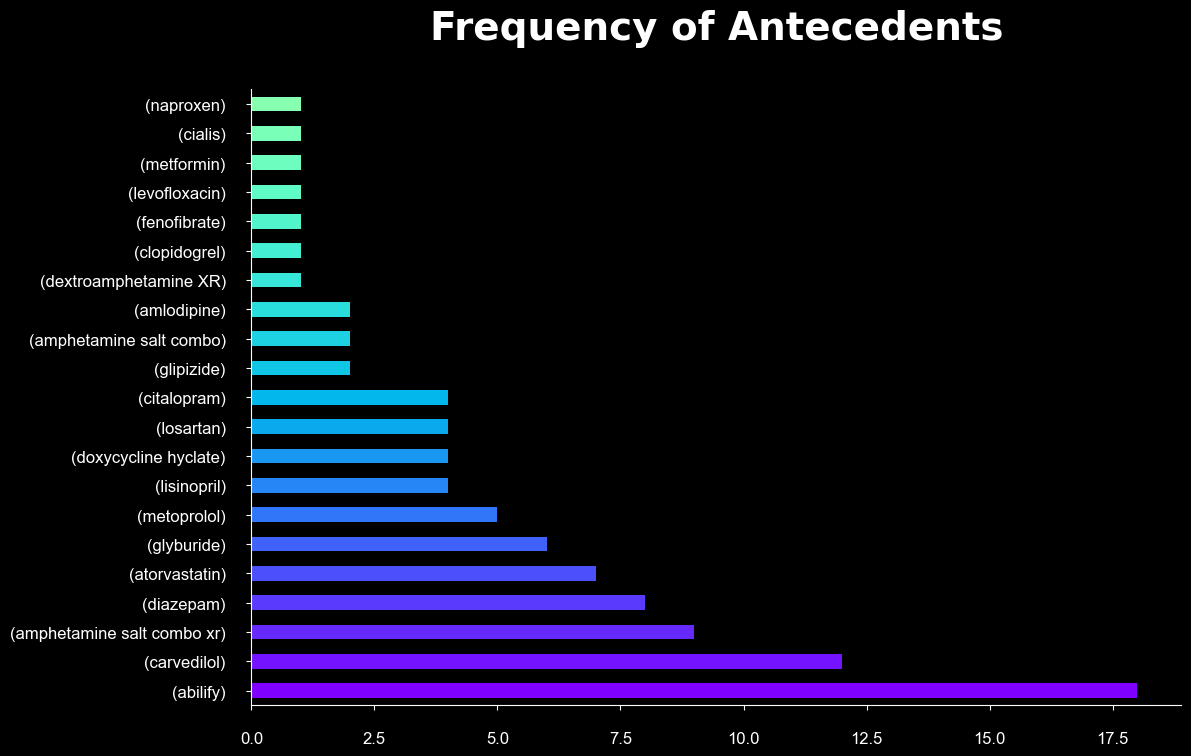

In [240]:
# Generate Bar Plot
color = plt.cm.rainbow(np.linspace(0, 1, 40))
fig, ax = plt.subplots(figsize=(12,8))
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.grid(False)
rules.antecedents.value_counts().head(40).plot.barh(color = color, grid=False)
plt.title('Frequency of Antecedents', family='Arial, sans-serif', fontweight='bold', fontsize=28, color='white', 
                     y=1.05, pad=14, horizontalalignment='center')
plt.tick_params(axis='both', labelsize=12, pad=15)
plt.xlabel("", family='Arial, sans-serif', fontsize=24, color='white', labelpad=20)
plt.ylabel("", family='Arial, sans-serif', fontsize=24, color='white', labelpad=20, rotation=90)
plt.show()


In [241]:
rules.antecedents.value_counts().head(3)

(abilify)                      18
(carvedilol)                   12
(amphetamine salt combo xr)     9
Name: antecedents, dtype: int64

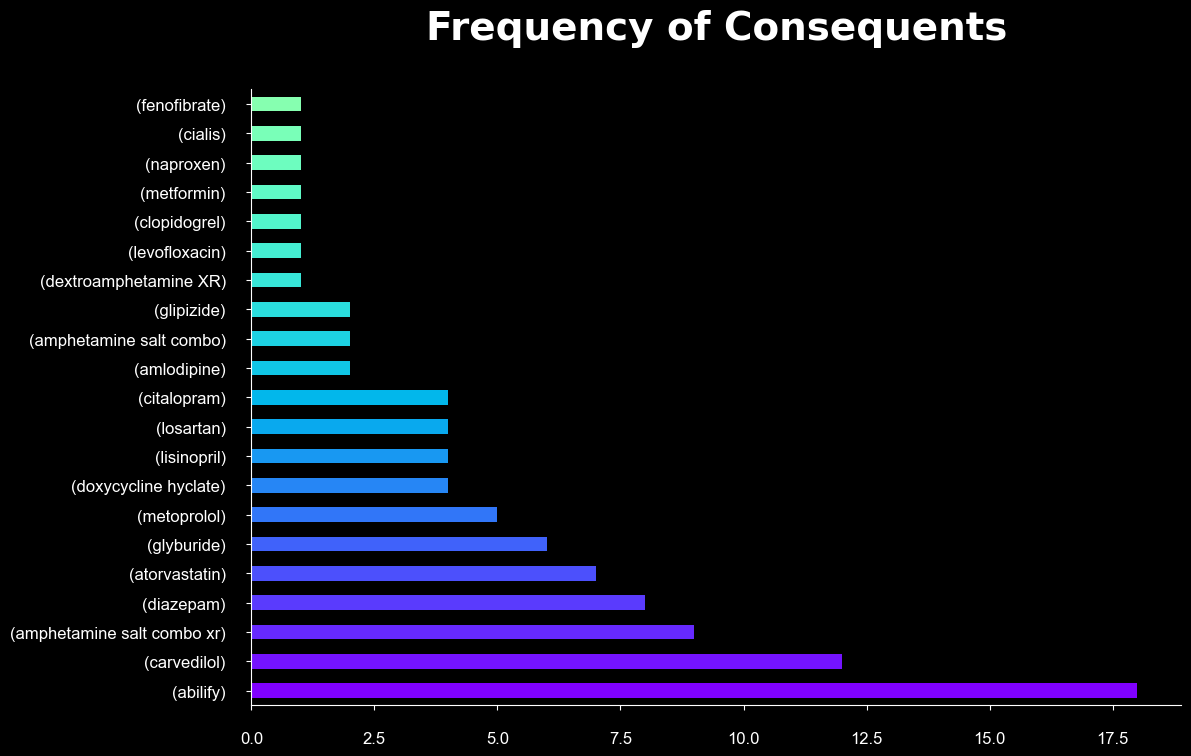

In [242]:
# Generate Bar Plot
color = plt.cm.rainbow(np.linspace(0, 1, 40))
fig, ax = plt.subplots(figsize=(12,8))
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.grid(False)
rules.consequents.value_counts().head(40).plot.barh(color = color, grid=False)
plt.title('Frequency of Consequents', family='Arial, sans-serif', fontweight='bold', fontsize=28, color='white', 
                     y=1.05, pad=14, horizontalalignment='center')
plt.tick_params(axis='both', labelsize=12, pad=15)
plt.xlabel("", family='Arial, sans-serif', fontsize=24, color='white', labelpad=20)
plt.ylabel("", family='Arial, sans-serif', fontsize=24, color='white', labelpad=20, rotation=90)
plt.show()

In [243]:
rules.consequents.value_counts().head(3)

(abilify)                      18
(carvedilol)                   12
(amphetamine salt combo xr)     9
Name: consequents, dtype: int64

In [244]:
# Top 3 Rules
df_ant = rules[rules['antecedents'] == {'amphetamine salt combo xr'}].sort_values(by=['support'], ascending=False).round(3)
df_con = rules[rules['consequents'] == {'amphetamine salt combo xr'}].sort_values(by=['support'], ascending=False).round(3)
df_amphetamine = pd.concat([df_ant.head(3), df_con.head(3)])
df_amphetamine[cols].round(3)

,antecedents,consequents,lift,confidence,support
4,(amphetamine salt combo xr),(abilify),1.190,0.283,0.051
43,(amphetamine salt combo xr),(carvedilol),1.181,0.206,0.037
51,(amphetamine salt combo xr),(glyburide),1.170,0.200,0.036
5,(abilify),(amphetamine salt combo xr),1.190,0.214,0.051
42,(carvedilol),(amphetamine salt combo xr),1.181,0.213,0.037
50,(glyburide),(amphetamine salt combo xr),1.170,0.211,0.036


<span style="color:green"><b>Metric Rules of `amphetamine salt combo xr`:</b></span>
* $ Support = \frac {frequency (X, Y)}{N} $
&ensp; &#10233; &ensp; 
* $ Confidence = \frac {frequency (X, Y)}{frequency(X)} $
&ensp; &#10233; &ensp; 
* $ Lift = \frac {Support}{Support(X) * Support(Y)} $
&ensp; &#10233; &ensp; 
<br>
<br>

Although the result indicated a total of 9 rules where `amphetamine salt combo xr` was found in transactions, I focused on the top 3 to provide a focused measurement. All three rules had the same score for `lift` and `support` with only `confidence` being higher where `amphetamine salt combo xr` was the `antecedents`, in other words <b>"If `amphetamine salt combo xr` then `abilify`</b>
<br>
<br>

Support is referred to the proportion of transactions containing the rule of the total transactions in the dataset:

<i>If `abilify` then `amphetamine salt combo xr`:</i>
- Support = 0.051 indicates about 5% of 7501 transactions contain both `amphetamine salt combo xr` and `abilify`

<i>If `carvedilol` then `amphetamine salt combo xr`:</i>
- Support = 0.037 indicates about 4% of 7501 transactions contain both `amphetamine salt combo xr` and `carvedilol`

<i>If `glyburide` then `amphetamine salt combo xr`:</i>
- Support = 0.036 indicates about 4% of 7501 transactions contain both `amphetamine salt combo xr` and `glyburide`

<br>
<br>
The concept of lift refers to the extent by which the probability of purchasing both the antecedents and consequents exceeds what would be expected if there was no association between them.:

<i>If `abilify` then `amphetamine salt combo xr`:</i>
- Lift = 1.19 times more likely to purchase consequent `amphetamine salt combo xr` if `abilify` is purchased

<i>If `carvedilol` then `amphetamine salt combo xr`:</i>
- Lift = 1.18 times more likely to purchase consequent `amphetamine salt combo xr` if `carvedilol` is purchased

<i>If `glyburide` then `amphetamine salt combo xr`:</i>
- Lift = 1.17 times more likely to purchase consequent `amphetamine salt combo xr` if `glyburide` is purchased

<br>
<br>
The confidence of a rule is calculated by dividing the number of transactions that include both the antecedents and the rule 'amphetamine salt combo xr' by the total number of transactions that contain only the antecedents. For two of the `antecedents` (carvedilol & glyburide), the confidence score isn’t significantly different (1% difference) if `amphetamine` was the `antecedent`, but for `abilify` it is. The confidence score when a patient makes a purchase of `amphetamine` that they will purchase `abilify` as well is 28% versus the patient purchasing `abilify` then `amphetamine` is 21%. There is a medical reason as to why this is the case which will be explained in the next section.

<a id="#PartD2"></a>
## <span style="color:green">D2: Practical Significance</span>

Based on the metrics of support, confidence, and lift it can be concluded that a significantly positive relationship exists among the top three rules. Finding insightful information among data is only one part of the analysis, so to fully understand why there were numerous medications as consequents and vice versa I did a little research and discovered the majority are referenced as “beta blockers”.  With amphetamine producing hormone epinephrine, known as adrenaline, beta blockers will attempt to block those effects, but is not something a doctor would recommend since it could elevate the risk of side effects, drug interactions and other undesirable events [(Mayo Clinic, 2021)]( https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/in-depth/beta-blockers/art-20044522). Overall, I found market basket analysis to be significant with the discoveries made and with the potential to find other meaningful data if other unsupervised learning methods were applied such as random forest or decision trees. 

<a id="#PartD3"></a>
## <span style="color:green">D3: Recommendations</span>

Co-administering amphetamines with other medications, such as Abilify, is not a recommended practice as it may increase the risk of side effects, drug interactions, and other adverse events. Amphetamines are used for ADHD and narcolepsy, while Abilify is used for schizophrenia, bipolar disorder, and depression. Co-prescribing these two medications for the same condition has no medical indication. Instead, healthcare providers may explore alternative treatment options for co-occurring conditions, and it is essential for patients to disclose all medications to their healthcare provider to ensure the safest and most effective treatment.

# Part V: Attachments

<a id="#PartE"></a>
## <span style="color:green">E: Panopto Recording</span>

WGU Hosted Video of Analysis: 
https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=3f62d9d2-bd08-4255-a0bb-aff100c15ac8

<a id="#PartF"></a>
## <span style="color:green">F: Third-Party Code</span>

```
Market Basket Analysis in Python. (n.d.). 
    https://goldinlocks.github.io/Market-Basket-Analysis-in-Python/

Towards AI Editorial Team. (2021, December 16). Principal Component Analysis (PCA) with Python Examples — Tutorial. Medium. 
    https://pub.towardsai.net/principal-component-analysis-pca-with-python-examples-tutorial-67a917bae9aa
    
Selvaraj, N. (2023). How to Perform Market Basket Analysis in Python. 365 Data Science. 
    https://365datascience.com/tutorials/python-tutorials/market-basket-analysis/

```
<a id="#PartF"></a>
## <span style="color:green">F: Sources</span>

```
Beta blockers. (2021, August 13). Mayo Clinic. 
    https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/in-depth/beta-blockers/art-20044522

Abilify and amphetamine Interactions. (n.d.). Drugs.com. 
    https://www.drugs.com/drug-interactions/abilify-with-amphetamine-233-109-2543-0.html

Kumar, V. (2020). Hands-On Guide To Market Basket Analysis With Python Codes. Analytics India Magazine. 
    https://analyticsindiamag.com/hands-on-guide-to-market-basket-analysis-with-python-codes/

```